# Supervised Learning
The idea of this notebook is using different learning machines in order to see how good are timbral features to describe musical genres. 
The data used is extracted from the GTZAN dataset: mfcc using gaussian windows with 60% overlapping. The features are the mean of the mfcc and the flattened covariance matrix for a total of 250 features

In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from numpy import interp
from sklearn import preprocessing,manifold
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split, StratifiedKFold
#from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, auc

In [2]:
data = pd.read_csv("mfcc.csv",header=None)
data = pd.DataFrame(data).to_numpy()
data.shape

(1000, 211)

Data preprocessing: Cleaning NaN and Normalizing without imposing a distribution

In [3]:
data = data[~np.isnan(data).any(axis=1)]
data.shape

target = data[:,-1]
X = data[:,:-1]
X_norm = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [13]:
def plotgenres(Xe,target,pred,title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.title.set_text('Real')
    ax2.title.set_text('Predicted')
    ax1.scatter(Xe[target==1,0],Xe[target==1,1],c="lightcoral",label="blues")
    ax1.scatter(Xe[target==2,0],Xe[target==2,1],c="turquoise",label="classical")
    ax1.scatter(Xe[target==3,0],Xe[target==3,1],c="teal",label="country")
    ax1.scatter(Xe[target==4,0],Xe[target==4,1],c="yellow",label="disco")
    ax1.scatter(Xe[target==5,0],Xe[target==5,1],c="darkorange",label="hiphop")
    ax1.scatter(Xe[target==6,0],Xe[target==6,1],c="darkred",label="jazz")
    ax1.scatter(Xe[target==7,0],Xe[target==7,1],c="black",label="metal")
    ax1.scatter(Xe[target==8,0],Xe[target==8,1],c="grey",label="pop")
    ax1.scatter(Xe[target==9,0],Xe[target==9,1],c="lightgreen",label="reggae")
    ax1.scatter(Xe[target==10,0],Xe[target==10,1],c="deeppink",label="rock")
    
    ax2.scatter(Xe[pred==1,0],Xe[pred==1,1],c="lightcoral",label="blues")
    ax2.scatter(Xe[pred==2,0],Xe[pred==2,1],c="turquoise",label="classical")
    ax2.scatter(Xe[pred==3,0],Xe[pred==3,1],c="teal",label="country")
    ax2.scatter(Xe[pred==4,0],Xe[pred==4,1],c="yellow",label="disco")
    ax2.scatter(Xe[pred==5,0],Xe[pred==5,1],c="darkorange",label="hiphop")
    ax2.scatter(Xe[pred==6,0],Xe[pred==6,1],c="darkred",label="jazz")
    ax2.scatter(Xe[pred==7,0],Xe[pred==7,1],c="black",label="metal")
    ax2.scatter(Xe[pred==8,0],Xe[pred==8,1],c="grey",label="pop")
    ax2.scatter(Xe[pred==9,0],Xe[pred==9,1],c="lightgreen",label="reggae")
    ax2.scatter(Xe[pred==10,0],Xe[pred==10,1],c="deeppink",label="rock")
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center')
    fig.suptitle(title)
    plt.show()

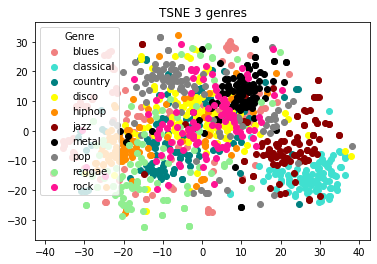

In [12]:
Xe= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_norm)
fig,ax=plt.subplots()
ax.scatter(Xe[target==1,0],Xe[target==1,1],c="lightcoral",label="blues")
ax.scatter(Xe[target==2,0],Xe[target==2,1],c="turquoise",label="classical")
ax.scatter(Xe[target==3,0],Xe[target==3,1],c="teal",label="country")
ax.scatter(Xe[target==4,0],Xe[target==4,1],c="yellow",label="disco")
ax.scatter(Xe[target==5,0],Xe[target==5,1],c="darkorange",label="hiphop")
ax.scatter(Xe[target==6,0],Xe[target==6,1],c="darkred",label="jazz")
ax.scatter(Xe[target==7,0],Xe[target==7,1],c="black",label="metal")
ax.scatter(Xe[target==8,0],Xe[target==8,1],c="grey",label="pop")
ax.scatter(Xe[target==9,0],Xe[target==9,1],c="lightgreen",label="reggae")
ax.scatter(Xe[target==10,0],Xe[target==10,1],c="deeppink",label="rock")
plt.legend(loc='upper left',title="Genre")
plt.title('TSNE 3 genres')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, target, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [16]:
Xe_test= manifold.TSNE( metric='euclidean', method='barnes_hut').fit_transform(X_test)

## Classifiers

### Logistic Regression

In [17]:
logistic = LogisticRegression(max_iter = 100000)
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

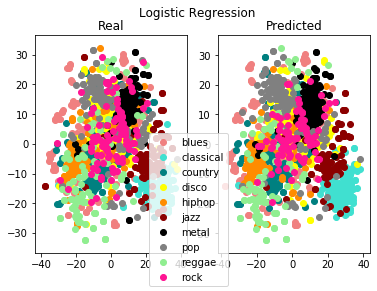

In [18]:
pred = logistic.predict(X_norm)
plotgenres(Xe,target,pred,"Logistic Regression")

In [19]:
pred = logistic.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

Precision: 0.696969696969697
Recall: 0.696969696969697
F1 Score: 0.696969696969697


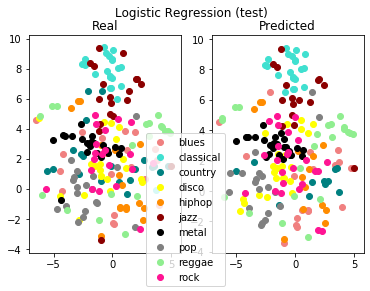

In [20]:
plotgenres(Xe_test,y_test,pred,"Logistic Regression (test)")

## Decision Tree

In [21]:
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

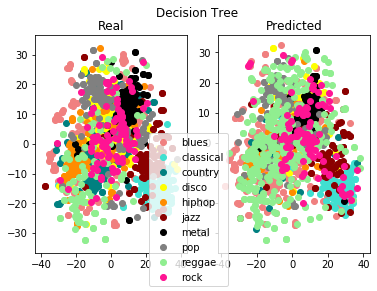

In [22]:
pred = clf.predict(X_norm)
plotgenres(Xe,target,pred,"Decision Tree")

In [23]:
pred = clf.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

Precision: 0.3787878787878788
Recall: 0.3787878787878788
F1 Score: 0.3787878787878788


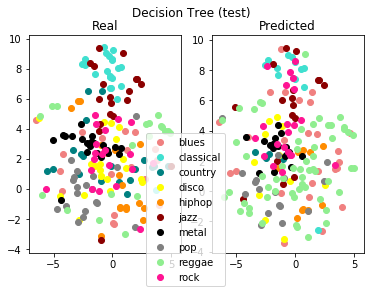

In [24]:
plotgenres(Xe_test,y_test,pred,"Decision Tree (test)")

## Support vector machine

Kernels:
* Lineal
* Polynomial
* Radial base

In [25]:
clf2 = svm.SVC(kernel = 'rbf')
clf2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

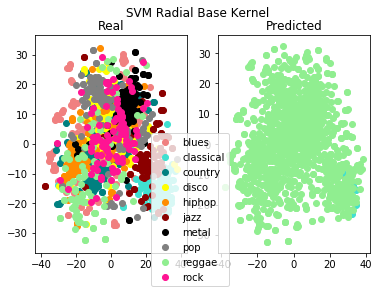

In [26]:
pred = clf2.predict(X_norm)
plotgenres(Xe,target,pred,"SVM Radial Base Kernel")

In [27]:
pred = clf2.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print(scores)
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

(0.10101010101010101, 0.10101010101010101, 0.10101010101010101, None)
Precision: 0.10101010101010101
Recall: 0.10101010101010101
F1 Score: 0.10101010101010101


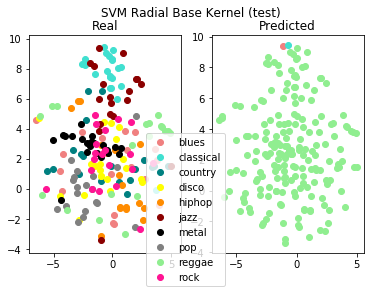

In [28]:
plotgenres(Xe_test,y_test,pred,"SVM Radial Base Kernel (test)")

In [29]:
clf2 = svm.SVC(kernel = 'linear')
clf2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

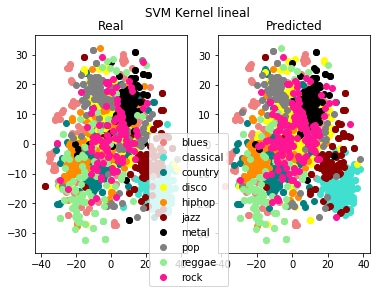

In [30]:
pred = clf2.predict(X_norm)
plotgenres(Xe,target,pred,"SVM Kernel lineal")

In [31]:
pred = clf2.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

Precision: 0.7121212121212122
Recall: 0.7121212121212122
F1 Score: 0.7121212121212122


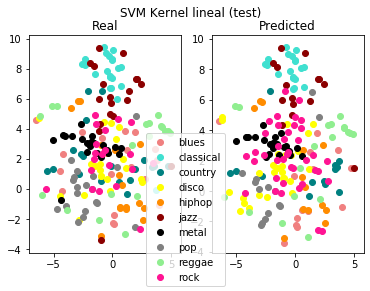

In [32]:
plotgenres(Xe_test,y_test,pred,"SVM Kernel lineal (test)")

In [33]:
clf2 = svm.SVC(kernel = 'poly',degree=3)
clf2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

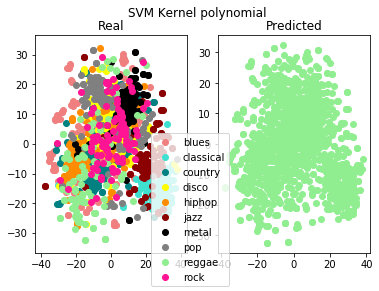

In [34]:
pred = clf2.predict(X_norm)
plotgenres(Xe,target,pred,"SVM Kernel polynomial")

In [35]:
pred = clf2.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

Precision: 0.09595959595959595
Recall: 0.09595959595959595
F1 Score: 0.09595959595959595


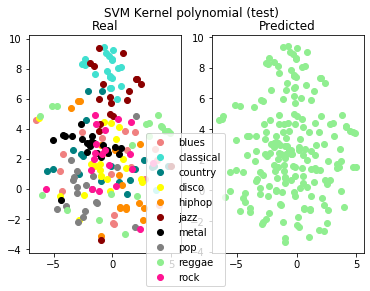

In [36]:
plotgenres(Xe_test,y_test,pred,"SVM Kernel polynomial (test)")

## Multilayer Perceptron

* Hidden layers: $L = 1,...,3$
* Number of neurons in the hidden layers: $l_i = 1,2,3$
* Learning rate: 0.2,0.5,0.9

In [37]:
learning_rate = [0.2,0.5,0.9]
nn =  MLPClassifier(hidden_layer_sizes=(1,1,1), learning_rate_init=.2)
nn.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1, 1, 1), learning_rate='constant',
              learning_rate_init=0.2, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [52]:
learning_rate, activation = 0.2, 'relu'
error = 0
# Choose best performance with combinations of activations and learning rate
for act in ['relu','tanh','logistic']:
    for lr in [0.0002,0.0001,0.0009,0.005]:
        nn =  MLPClassifier(hidden_layer_sizes=(100,100,100,100,100),activation=act, learning_rate_init=lr)
        nn.fit(X_train,y_train)
        err = np.sum(nn.predict(X_val) == y_val)/len(y_val)
        print(act,lr,err)
        if(err > error):
            learning_rate, activation, error = lr,act,err
nn =  MLPClassifier(hidden_layer_sizes=(100,100,100,100,100),activation=activation, learning_rate_init=learning_rate)
nn.fit(X_train,y_train)

relu 0.0002 0.6477987421383647
relu 0.0001 0.5408805031446541
relu 0.0009 0.6163522012578616
relu 0.005 0.44654088050314467
tanh 0.0002 0.6477987421383647
tanh 0.0001 0.6163522012578616
tanh 0.0009 0.6226415094339622
tanh 0.005 0.3710691823899371
logistic 0.0002 0.06289308176100629
logistic 0.0001 0.06289308176100629
logistic 0.0009 0.06918238993710692
logistic 0.005 0.44654088050314467


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100, 100, 100),
              learning_rate='constant', learning_rate_init=0.0002, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

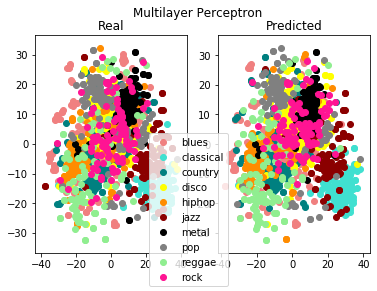

0.8798889016566503


In [53]:
pred = nn.predict(X_norm)
plotgenres(Xe,target,pred,"Multilayer Perceptron")
print(nn.loss_)

In [54]:
pred = nn.predict(X_test)
scores = precision_recall_fscore_support(y_test, pred,average='micro')
print('Precision:',scores[0])
print('Recall:',scores[1])
print('F1 Score:',scores[2])

Precision: 0.6313131313131313
Recall: 0.6313131313131313
F1 Score: 0.6313131313131313


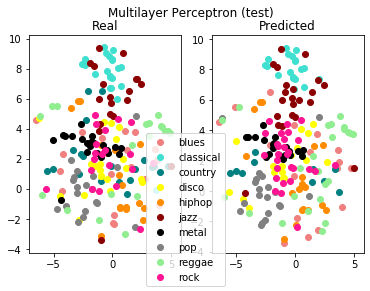

In [55]:
plotgenres(Xe_test,y_test,pred,"Multilayer Perceptron (test)")

| Parámetro | Logistic  Regression | Decision Tree | SVM Linear | SVM rbf | SVM Poly | Multilayer Perceptron |
|:---------:|:--------------------:|:-------------:|:----------:|:-------:|:--------:|:---------------------:|
| Precision |         0.933        |     0.883     |    0.95    |   0.6   |   0.516  |         0.933         |
|   Recall  |         0.933        |     0.883     |    0.95    |   0.6   |   0.516  |         0.933         |
|     F1    |         0.933        |     0.883     |    0.95    |   0.6   |   0.516  |         0.933         |